# Naive Bayes

*Author: Dr. Vasile Rus (vrus@memphis.edu)*

Naive Bayes is a supervised data science method typically used for **classification/categorization** tasks as exemplified before in, for instance, the logistic regression notebook.
For that reason, it can be viewed as estimating the probabilities of a number of outcome variable values, e.g., the probabilities of categories in classification.
To classify a particular object or instance $X$, the class with the highest probability among all possible classes $1$ to $C$ is taken as shown below:

$$class (X) = argmax_{c \in (1..C)} P(c_i|X)$$ 
        
While quite successful in classification tasks, the actual estimated probabilities for each class are not very reliable.

In this notebook, we focus on multinomial, hard classification tasks.

## Mathematical Foundations of Naive Bayes for Binary, Hard Classification

We briefly review in this section the mathematical formulation of the Naive Bayes method for multinomial, hard classification problems. 
That is, we assume the outcome for one instance or object can be one and only one category out $C$ possible categories.

The Naive Bayes method relies on Bayes' Theorem shown below:

$$P (Y|X) = \frac{P(Y)P(X|Y)}{P(X)}$$

The term $P (Y|X) $ is called the posterior, the term $P(Y)$ is called the prior, and the term $P(X|Y)$ is called the likelihood.

In a classification case, Y can take as value any of the classes $c \in (1..C)$ and X is described as a set of features/predictors $X=(x_1,..,x_P)$. 
Then Bayes' Theorem becomes:

$$P (Y=c_i| (x_1,..,x_P)) = \frac{P(Y=c_i)P(x_1,..,x_P|Y=c_i)}{P(x_1,..,x_P)}$$

The Naive Bayes method takes this theorem and based on the naive assumption of the predictors $x_i$ being independent, i.e., meaning $P(x_1,..,x_P|Y=c_i)$ is approximated by $\prod \limits _{j=1} ^P P(x_j|c_i)$, it re-writes the theorem in the following form:

$$P (Y=c_i| (x_1,..,x_P)) = \frac{P(Y=c_i) \prod \limits _{j=1} ^P P(x_j|c_i)}{P(x_1,..,x_P)}$$

This naive formulation of the theorem is more manageable in terms of estimating the parameters of the distrubtions involved and in particular of the likelihood probability.

## Training a Naive Bayes Classifier

Training a Naive Bayes classifier implies deriving the prior and likelihood distributions from training data based on the naive formulation of Bayes' Theorem.

The prior $P(c_i)$ is derived using the following expression:

$$ P(c_i)= \frac{{\#} c_i}{N}$$

where ${\#} c_i$ is the number of training instances labeled with class $i$ and $N$ is the total number of training instances.

The likelihood $P (X | Y) = \prod _{j=1} ^P P(x_j|c_i) = \prod P(x_1|c_i)P(x_2|c_i)... P(x_P|c_i)$ is derived by multiplying individual conditional distributions for each predictor $x_i$ as shown below:

$$ P(x_i|c_i) = \frac{{\#} x_{ci}}{{\#} c_i}$$

Once the prior and likelihood distributions derived, to predict the most likely class for a new instance $X=(x_i, ..., x_P)$ we apply the Naive Bayes formula:

$$class (X) = argmax_{c \in (1..C)} {P(c_i|X)} = argmax_{c \in (1..C)} P (Y=c_i| (x_1,..,x_P)) = argmax_{c \in (1..C)} \frac{P(Y=c_i) P(x_1|c_i)P(x_2|c_i)... P(x_P|c_i)}{P(x_1,..,x_P)} $$

Since the denominator does not depend on $c_i$, the argument of argmax, we can ignore the denominator.
Then the most likely class can be simply obtained using this formula:

$$class (X) = argmax_{c \in (1..C)} P(c_i|X) = argmax_{c \in (1..C)} P(Y=c_i) P(x_1|c_i) P(x_2|c_i) ... P(x_P|c_i)$$ 

That is, the most likely class is the class correspond to the posterior probability estimated based on the above naive formulation of the Bayes Theorem.

<!-- NOTE: this has already been covered -->
<!-- ## Peformance Evaluation for Classification Methods including Naive Bayes

The typical performance metrics for classifiers are accuracy, precision, and recall. These are typical derived by compared the predicted output to the golden or actual output/categories in the expert labelled dataset.

For a binary classification case, we denote the category 1 as the positive category and category 0 as the negative category. Using this new terminology, When comparing the predicted categories to the actual categories we may end up with the following cases:
* True Positives (TP): instances predicted as belonging to the positive category and which in fact do belong to the positive category
* True Negatives (TN): instances predicted as belonging to the negative category and which in fact do belong to the negative category
* False Positives (FP): instances predicted as belonging to the positive category and which in fact do belong to the negative category
* False Negatives (FN): instances predicted as belonging to the negative category and which in fact do belong to the positive category

From these categories, we define the following metrics:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

Classfication methods that have a high accuracy are preferred in general although in some case maximizing precision or recall may be preferred. For instance, a high recall is highly recommended when making medical diagnosis since it is preferrable to err on mis-diagnosing someone as having cancer as opposed to missing someone who indeed has cancer, i.e., the method should try not to miss anyone who may indeed have cancer. 

In general, there is a trade-off between precision and recall. If precision is high then recall is low and viceversa. Total recall (100% recall) is achievable by always predicting the positive class, i.e., label all instances as positive, in which case precision will be very low. -->

## Example: Naive Bayes

The data we will use is the `nursery` dataset, which ranks applications for nursery schools in Slovenia during the 1980s.
Because the original dataset is a fair bit larger, we've randomly sampled 2000 rows.

The goal is to predict `rank`.

| Variable | Type    | Description                                        |
|:----------|:---------|:----------------------------------------------------|
| parents  | Nominal | usual, pretentious, great_pret                     |
| has_nurs | Nominal | proper, less_proper, improper, critical, very_crit |
| form     | Nominal | complete, completed, incomplete, foster            |
| children | Nominal | 1, 2, 3, more                                      |
| housing  | Nominal | convenient, less_conv, critical                    |
| finance  | Nominal | convenient, inconv                                 |
| social   | Nominal | non-prob, slightly_prob, problematic               |
| health   | Nominal | recommended, priority, not_recom                   |
| rank    | Nominal | not_recom, recommend, very_recom, priority, spec_prior   |

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Nursery)

### Load data

Import `pandas` so we can load a dataframe:

- `import pandas as pd`

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="G*NhDz5Jo?CcaJf3rUv}" x="150" y="308"><field name="libraryName">pandas</field><field name="libraryAlias" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe:

- Create `dataframe` and set it to `with pd do read_csv using` a list containing
    - `"datasets/nursery.csv"`
- `dataframe`

In [85]:
dataframe = pd.read_csv('datasets/nursery.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="x*dHwc!e,/XY5e1C_ak1"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="tN4Jmaffy/={ZFo;uu;W"><field name="TEXT">datasets/nursery.csv</field></block></value></block></value></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,parents,has_nurs,form,children,housing,finance,social,heath,rank
0,pretentious,very_crit,complete,more,less_conv,convenient,problematic,not_recom,not_recom
1,pretentious,proper,foster,more,critical,convenient,slightly_prob,recommended,priority
2,pretentious,critical,foster,3,less_conv,convenient,slightly_prob,recommended,spec_prior
3,great_pret,critical,completed,3,less_conv,convenient,nonprob,not_recom,not_recom
4,usual,less_proper,incomplete,3,convenient,inconv,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
1995,great_pret,proper,complete,1,critical,inconv,problematic,recommended,priority
1996,usual,critical,completed,3,convenient,inconv,nonprob,not_recom,not_recom
1997,great_pret,less_proper,complete,1,convenient,convenient,slightly_prob,priority,priority
1998,great_pret,proper,foster,1,critical,inconv,nonprob,recommended,priority


## Explore data

Let's check the data makes sense with the five figure summary:

- `with dataframe do describe using` 

In [8]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="-[lX-}4sT`|#7E(Sti)^" x="78" y="266"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,parents,has_nurs,form,children,housing,finance,social,heath,rank
count,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,3,5,4,4,3,2,3,3,4
top,great_pret,less_proper,completed,3,convenient,inconv,problematic,not_recom,not_recom
freq,718,416,523,536,684,1024,689,682,682


What did we get?
It's not a five figure summary because our variables are nominal, and there's no such thing as mean, median, etc., with nominal data.
Instead we have the number of *unique* levels of each variable, the *top* or most frequent level, and the *freq*uency of that level.
Moreover, the count is 2000 across all variables, indicating there are no NaNs.

Because the variables are nominal, many of our standard tools won't work.
For example, we can't use a correlation matrix/heatmap, because correlation isn't defined for nominal variables.
There is something called [Cramer's V](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) that is close, but it requires some custom coding that's a bit out of scope for us.
One thing we can do is plot each variable separately.

First import `plotly.express`:

- `import plotly.express as px`

In [11]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

Next create an empty histogram figure:

- Create `fig` and set it to `with px do histogram using`

In [20]:
fig = px.histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="variables_set" id="Ud?VzKCO`DdWL1!WV3u0" x="72" y="201"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="}D2RF2=Z|$`_ypJyLDYt"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data></block></value></block></xml>

Create all the figures in a loop:

- `for i in from dataframe get columns`
    - Set `fig` to `with px do histogram using` a list containing
        - `dataframe`
        - freestyle `x=i` (`i` will take on the name of a column on each loop)
    - Empty freestyle followed by `with fig do show using`

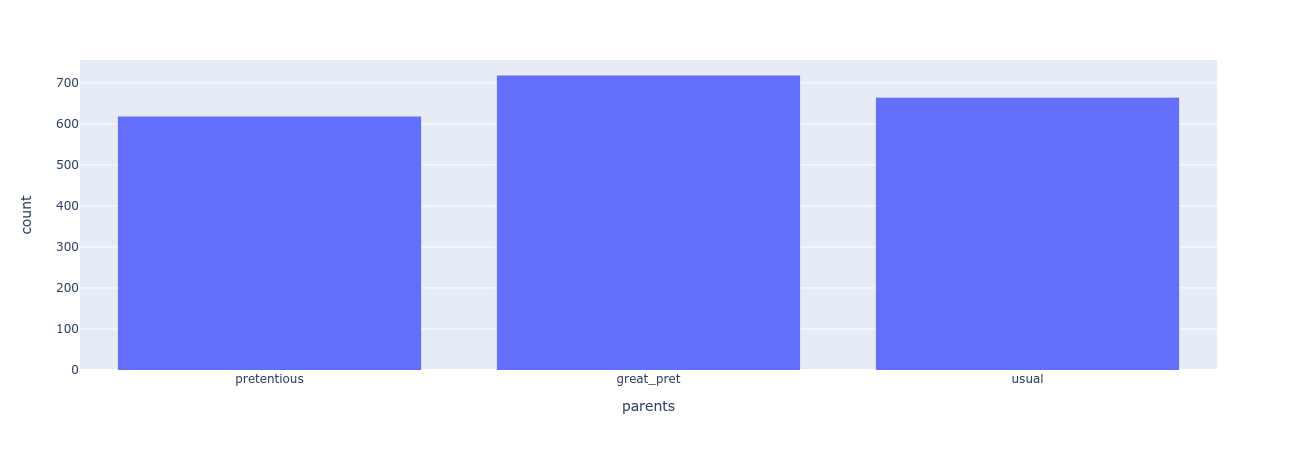

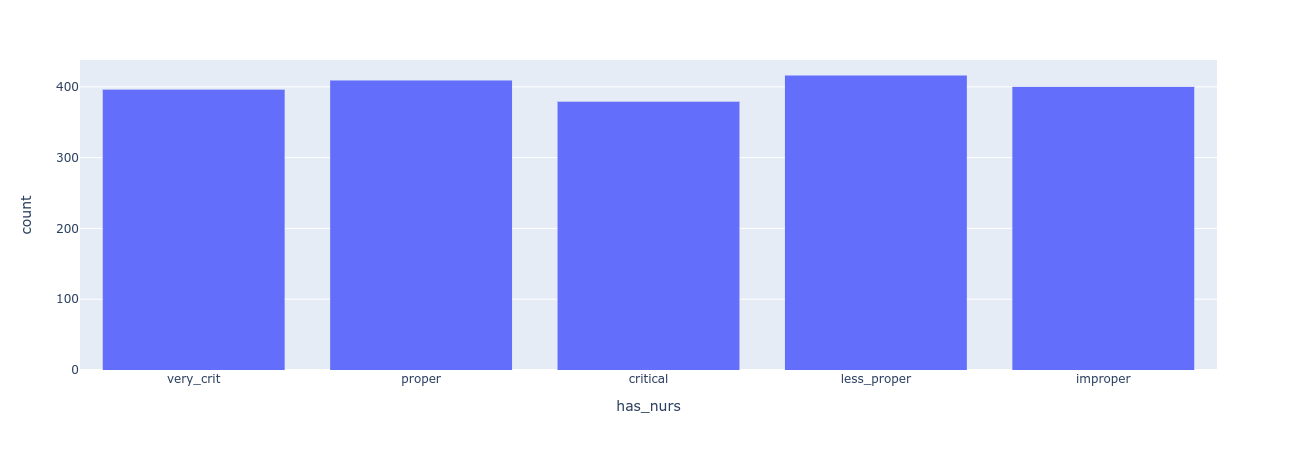

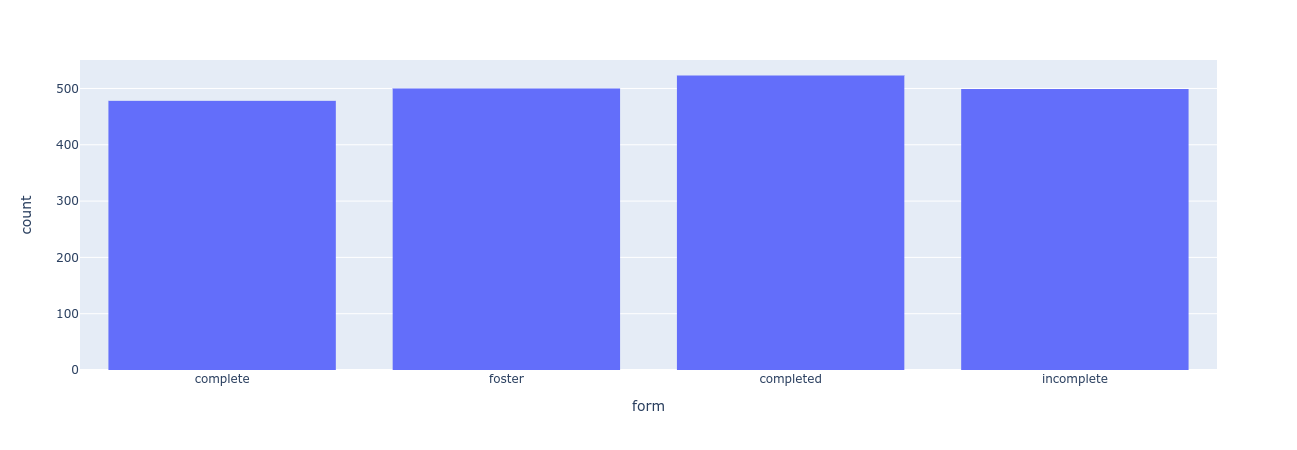

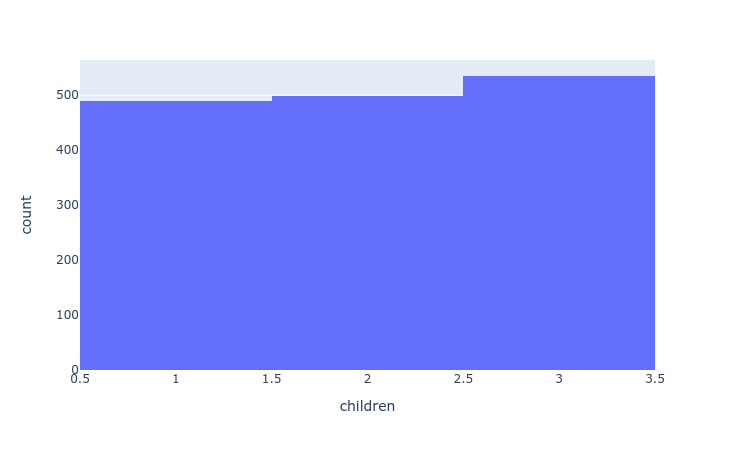

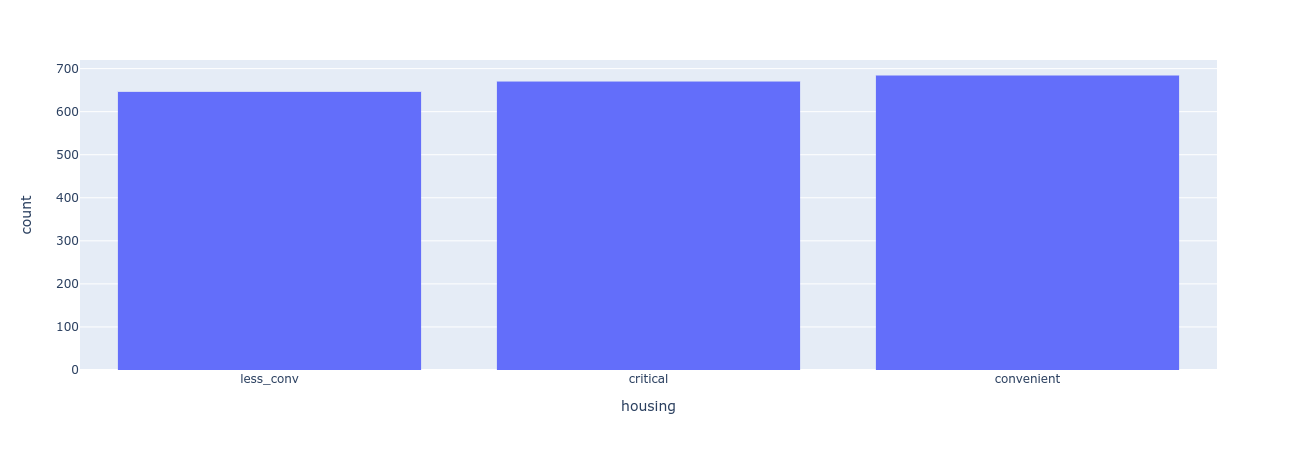

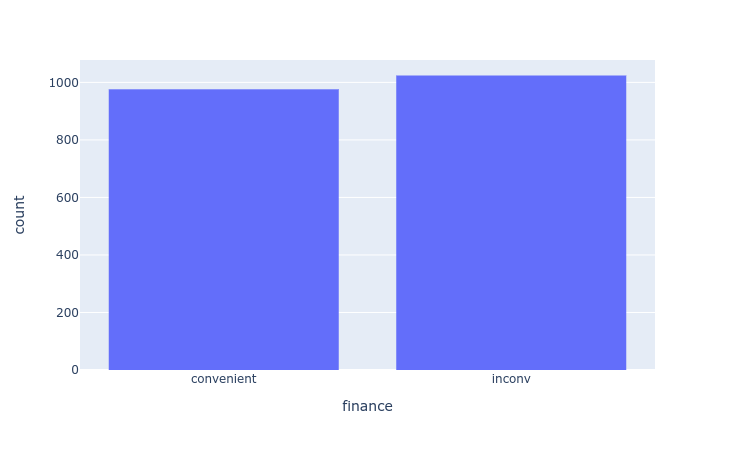

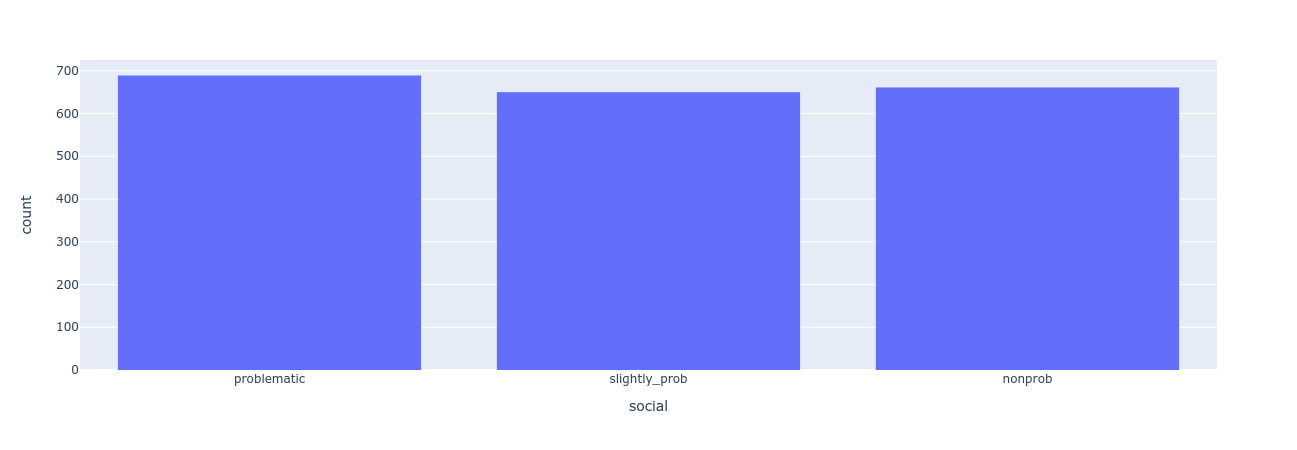

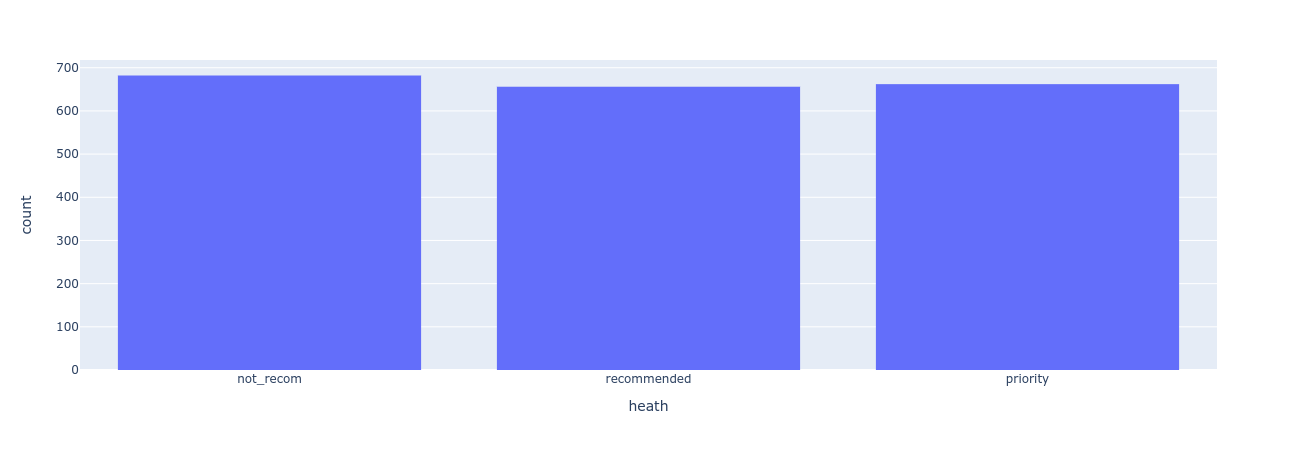

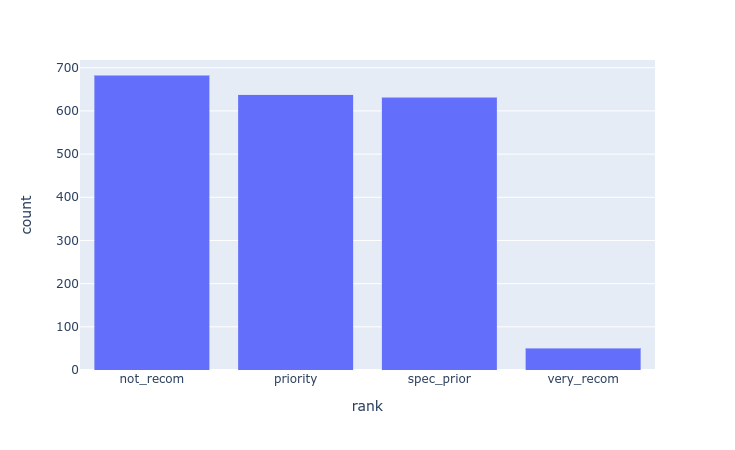

In [21]:
for i in dataframe.columns:
  fig = px.histogram(dataframe, x=i)
  (fig.show())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="n+-#0`*wD8rg+dSg6M^w">i</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="controls_forEach" id="7YJ)K?q9poiHMo2hO,si" x="159" y="297"><field name="VAR" id="n+-#0`*wD8rg+dSg6M^w">i</field><value name="LIST"><block type="varGetProperty" id="k3#lLk(++xN{Qk3$B!$/"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">columns</field><data>dataframe:columns</data></block></value><statement name="DO"><block type="variables_set" id="JN`QXdt~zSW=Hr{(pqls"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="{:}eVR02P7FStzQGj0GV"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="+1ab50iuN1{=}kB6mhZH"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="mQ9=gXbU-Tlr[a!+Z~PN"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="hJq@W1q];BsF7]9/8:rP"><field name="CODE">x=i</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="(zDrmSRou~?8NOFz?_:t"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id="S6kF2H)`W^?,.3{VU8x1"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></value></block></next></block></statement></block></xml>

Interestingly, all the variables have levels that occur with about the same frequency, except for `rank`, which is very imbalanced with respect to `very_recom`.

### Prepare train/test sets

Let's separate our predictors (`X`) from our class label (`Y`), putting each into its own dataframe:

- Create `X` and set to `with dataframe do drop using` a list containing
    - freestyle `columns=["rank"]`
- Create `Y` and set to `dataframe [ ]` containing a list with `"rank"` inside

In [86]:
X = dataframe.drop(columns=["rank"])
Y = dataframe[['rank']]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="27" y="188"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="k7t38%eJz)@=B8{vW^(u"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="INPUT"><block type="lists_create_with" id="GF+zQWW-#ABEFw$9!#^8"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="fk{P(H^@/_!^1+tw-Hi*"><field name="CODE">columns=["rank"]</field></block></value></block></value></block></value><next><block type="variables_set" id=":eCC|=CT/c:_fzcI.h5%"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="indexer" id="A%ev_@Jrd7:a(Gozw{Zv"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="lists_create_with" id="v`ZwcnYa3]GMVDC!T3al"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="H9b;qzWmM({49_lwSk(2"><field name="TEXT">rank</field></block></value></block></value></block></value></block></next></block></xml>

The model we will use is Bernoulli naive Bayes.
This model needs numeric predictors, but can have nominal class labels.
So we need to get dummies for `X` only:

- Set `X` to `with pd get_dummies using` a list containing
    - `X`
- `X` (so you can see what happened)


In [87]:
X = pd.get_dummies(X)

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="17" y="246"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="!snzGlMsbL.%p)$iCu~-"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="INPUT"><block type="lists_create_with" id="iiIg%n|P;1H4Uu_(3Eqf"><mutation items="1"></mutation><value name="ADD0"><block type="variables_get" id="!(L^?R}r`]R[RgQMDh{H"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value></block></value></block></value></block><block type="variables_get" id="esj).}av[rq%)lp@R1MD" x="31" y="312"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></xml>

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,form_foster,form_incomplete,children_1,children_2,children_3,children_more,housing_convenient,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,heath_not_recom,heath_priority,heath_recommended
0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
1996,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0
1997,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1998,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1


We're now ready to split the data into train/test sets:

- `import sklearn.model_selection as model_selection`

In [88]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual split:

- Create `splits` and set to `with model_selection do train_test_split` using a list containing
    - `X`
    - `Y`
    - freestyle `random_state=1`
    
Setting random_state will make our results match each other.

In [89]:
splits = model_selection.train_test_split(X, Y, random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="-102" y="134"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="uUY%r2L/7acQcS/KbQvx"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></value></block></xml>

### Fit model

We need to import libraries for:

- Naive Bayes
- Metrics
- Ravel

So do the following imports:

- `import sklearn.naive_bayes as naive_bayes`
- `import sklearn.metrics as metrics`
- `import numpy as np`

In [90]:
import sklearn.naive_bayes as naive_bayes
import numpy as np
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable></variables><block type="importAs" id=")Z,7_rQ8n$[soP8C+|xJ" x="51" y="43"><field name="libraryName">sklearn.naive_bayes</field><field name="libraryAlias" id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</field><next><block type="importAs" id="#n~K{o=Qop7Z[_YEjs`u"><field name="libraryName">numpy</field><field name="libraryAlias" id="hxqH|@PJU~wrI]t*tHgd">np</field><next><block type="importAs" id="{H02K*?VA0K3yr,FD/;h"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id="jpz]0=,hLYv~rN^#0dFO">metrics</field></block></next></block></next></block></xml>

Create the naive Bayes model:

- Create variable `naiveBayes` and set it to `with naive_bayes create BernoulliNB using` 

In [91]:
naiveBayes = naive_bayes.BernoulliNB()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="9" y="330"><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><value name="VALUE"><block type="varCreateObject" id="ar7keIh-Yv)+b+#Edsp_"><field name="VAR" id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</field><field name="MEMBER">BernoulliNB</field><data>naive_bayes:BernoulliNB</data></block></value></block></xml>

Train the model by calling `fit` on it:

-  `with naiveBayes do fit using` a list containing
    - `in list splits get # 1` (this is Xtrain)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (this is Ytrain)

In [92]:
naiveBayes.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="-94" y="192"><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><field name="MEMBER">fit</field><data>naiveBayes:fit</data><value name="INPUT"><block type="lists_create_with" id="qj[~!aNmN}=v;xQ.=$%L"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="~1yhID`7cKT3OGJbUA`C"><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="!2;YZV;l:7IzVqStgh^y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

And finally, get predictions:

- Create `predictions`
- Set it to `with naiveBayes do predict using` a list containing
    - `in list splits get #2`

In [93]:
predictions = naiveBayes.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="variables_set" id="FM4[*FDWeN(7%iHSAfQ?" x="-89" y="291"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field><value name="VALUE"><block type="varDoMethod" id="iyb},eS,^AG]P+e8|?_w"><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><field name="MEMBER">predict</field><data>naiveBayes:predict</data><value name="INPUT"><block type="lists_create_with" id="M~B*Kr~SV)~*y`D4O?Fo"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="fZwSBC7oN~ztuILQKhjb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="j+~A(%x]-W)Rd5k;,l#Z"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="LBFp2#($s_[4DJ8h!O;h"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block></xml>

### Evaluate the model

Get the accuracy:

- `with metrics do accuracy_score using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`

In [94]:
print(metrics.accuracy_score(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="u8M]eo-vRBhX!L/a@4+J" x="-102" y="208"><value name="TEXT"><shadow type="text" id=")gVsrXo+bq|?9m0cIU/Y"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="0B;?~qgT4?Xe8I|O=P)%"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:</data><value name="INPUT"><block type="lists_create_with" id="qe7YbU#WU/F|Iuks0C:c"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="13J^-{z`P=,aau/j:VF~"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="m^Z6y-8@L:s!oS)`%iJW"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="u}VxLP~*Dbl0g4[AO,bL"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="|3h,TPit9wg+a;bR[r$P"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

0.894


And get the recall and precision:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`
    

In [95]:
print(metrics.classification_report(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="jFo8knaDn;JRZ=Fj7Tzo" x="57" y="316"><value name="TEXT"><shadow type="text" id="QWuxwm12CzEZ-r2sdwCR"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="(y`#h=AgNH6X+ahL$2L$"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="A/#8KhfiGd[(@p,uaFFl"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="*N[l.zzXc*IdHJ-Ur0D)"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="fQYj?Tz[y/t|%9~{2Pf["><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="V(5k43YOsHPep%LEEd9Q"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="mX(20KX!C)d_,/ddeysr"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       177
    priority       0.79      0.89      0.84       155
  spec_prior       0.90      0.84      0.87       153
  very_recom       0.60      0.20      0.30        15

    accuracy                           0.89       500
   macro avg       0.82      0.73      0.75       500
weighted avg       0.89      0.89      0.89       500



Performance is surprisingly good except for the infrequent class, `very_recom`.

## Visualizing

### Feature importance

Extracting feature importance from naive Bayes models in `sklearn` is a bit more work than for other models.

We need to create a dataframe of the probabilities of predictors given the class label, i.e. the likelihoods, then give that dataframe correct row/column names, and finally raise it to the power of ten (because the default output is log):

- Create variable `output`
- Set it to `with pd create DataFrame` using a list containing
    - freestyle `naiveBayes.feature_log_prob_`
- Freestyle `output.index = naiveBayes.classes_`
- Freestyle `output.columns = X.columns`
- Freestyle `output = 10 ** output`
- `output` (to display)

In [97]:
output = pd.DataFrame(naiveBayes.feature_log_prob_)
output.index=naiveBayes.classes_
output.columns=X.columns
output = 10 ** output

output

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B1+(FA+B_0M9*6bKcj,o">output</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="}Wi.Es$z1j2(j!@$[xbi" x="-73" y="243"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field><value name="VALUE"><block type="varCreateObject" id="Gx%*Wd|3[h`8E50G5`^N"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">DataFrame</field><data>pd:DataFrame</data><value name="INPUT"><block type="lists_create_with" id=",r$A?`5owOJK8e89$*R$"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="IIag*ZRE,}l|c/d)-)27"><field name="CODE">naiveBayes.feature_log_prob_</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="HJ|j6,(HTvSn.axRTL/E"><field name="CODE">output.index=naiveBayes.classes_</field><next><block type="valueNoOutputCodeBlock" id=")Xb`8c/$7:fp*%yI5W*d"><field name="CODE">output.columns=X.columns</field><next><block type="valueNoOutputCodeBlock" id="!y@~L4n0kGS])aK}0`Wk"><field name="CODE">output = 10 ** output</field></block></next></block></next></block></next></block><block type="variables_get" id="JWibtF{|zPl%If4..muv" x="-66" y="440"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field></block></xml>

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,form_foster,form_incomplete,children_1,children_2,children_3,children_more,housing_convenient,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,heath_not_recom,heath_priority,heath_recommended
not_recom,0.096923,0.067257,0.077532,0.021669,0.028420,0.029646,0.023805,0.021669,0.034171,0.049144,0.037628,0.045903,0.033503,0.039793,0.051657,0.042026,0.086353,0.072291,0.081875,0.209202,0.196313,0.068247,0.095714,0.077532,9.954642e-01,5.908660e-07,5.908660e-07
priority,0.026490,0.070527,0.183930,0.006687,0.028356,0.058435,0.079308,0.001299,0.044282,0.045102,0.042668,0.034389,0.059394,0.043471,0.032991,0.032991,0.121835,0.063317,0.062323,0.198863,0.206578,0.101228,0.053774,0.089890,6.575293e-07,1.462253e-01,2.698008e-01
spec_prior,0.233065,0.054811,0.021185,0.061526,0.016153,0.004078,0.001821,0.111319,0.033627,0.046817,0.051170,0.035777,0.015691,0.042681,0.068683,0.050282,0.043491,0.115520,0.091625,0.149046,0.265850,0.052067,0.167640,0.046817,6.702146e-07,3.010947e-01,1.256647e-01
very_recom,0.000245,0.106694,0.334639,0.000245,0.089956,0.125064,0.049166,0.000245,0.106694,0.074815,0.009966,0.029412,0.106694,0.125064,0.021627,0.003074,0.443791,0.005962,0.029412,0.334639,0.106694,0.242557,0.000245,0.166838,2.449526e-04,2.449526e-04,9.388604e-01


Each column in this table shows the probability of that column's predictor given the classes shown in each row.
So `parents_great_pret` makes `spec_prior` .23 likely, the most likely class for this predictor.

It's a bit hard to read these, so we can also plot them in a loop:

- `for i in from output get columns`
    - Set `fig` to `with px do bar using` a list containing
        - `output`
        - freestyle `x=i` (`i` will take on the name of a column on each loop)
    - Empty freestyle followed by `with fig do show using`

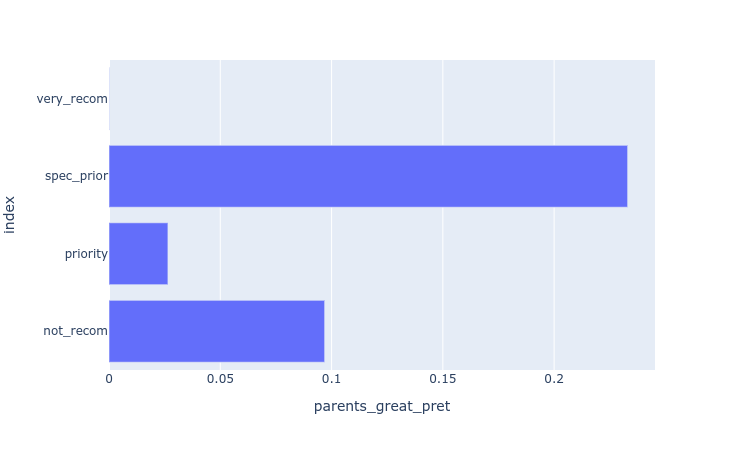

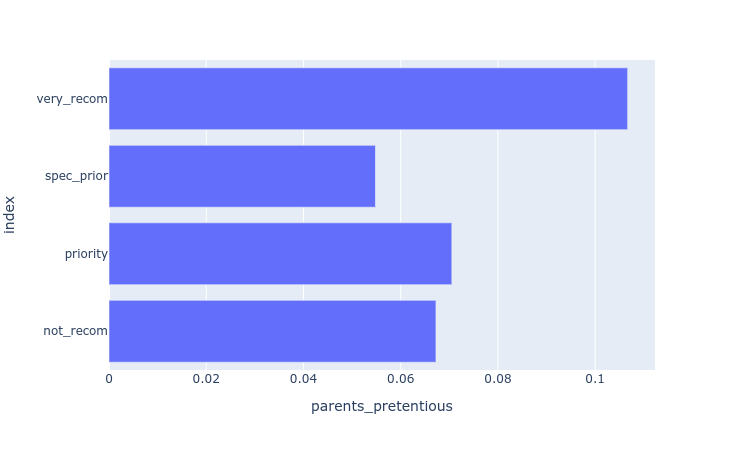

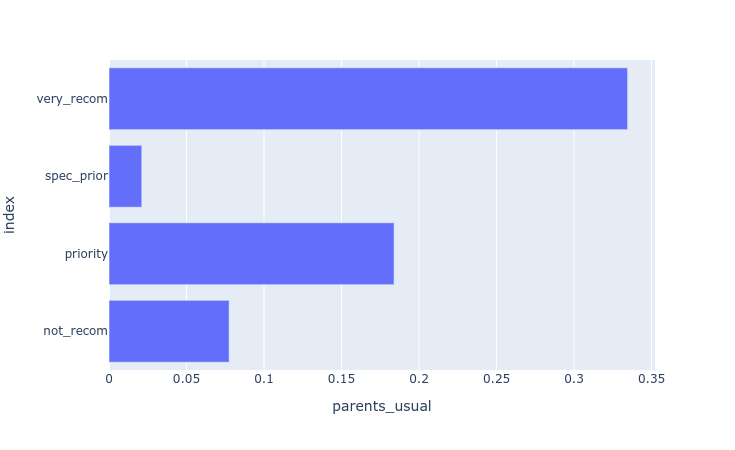

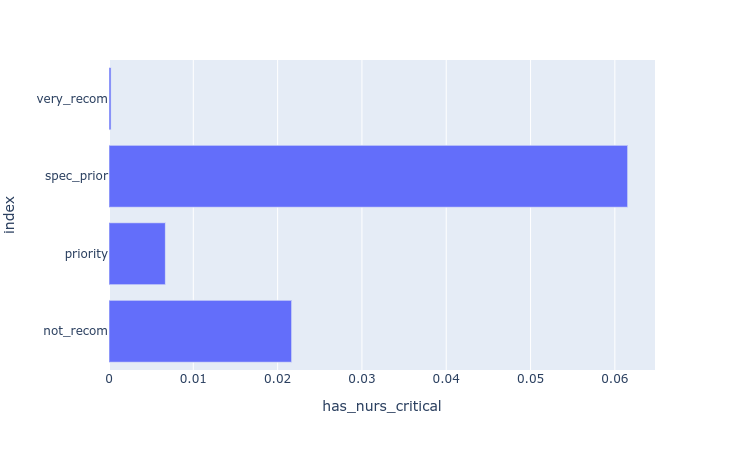

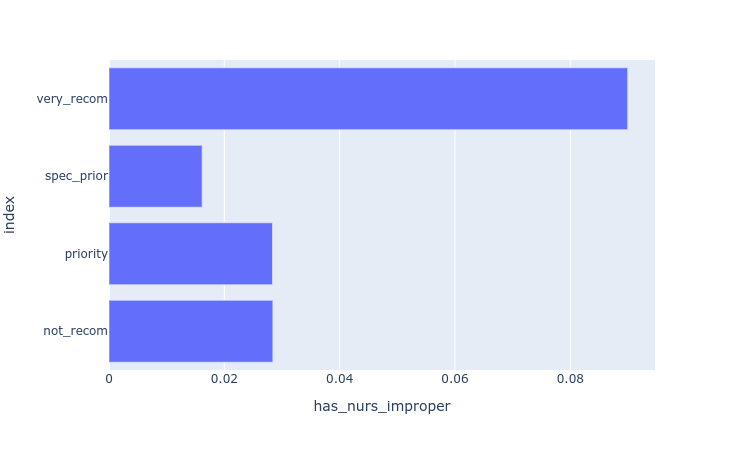

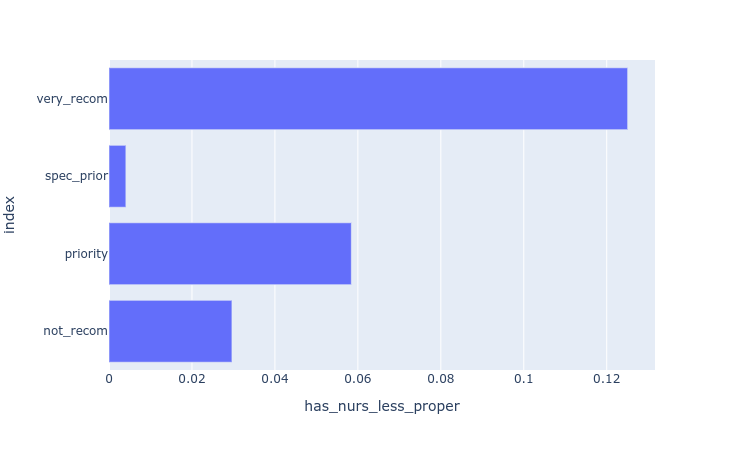

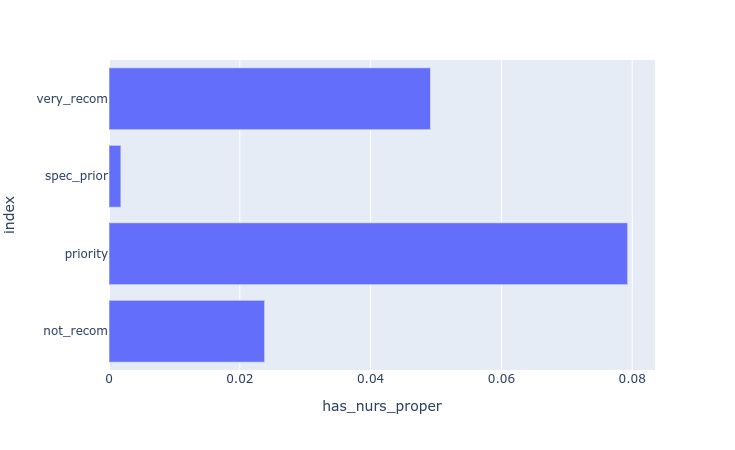

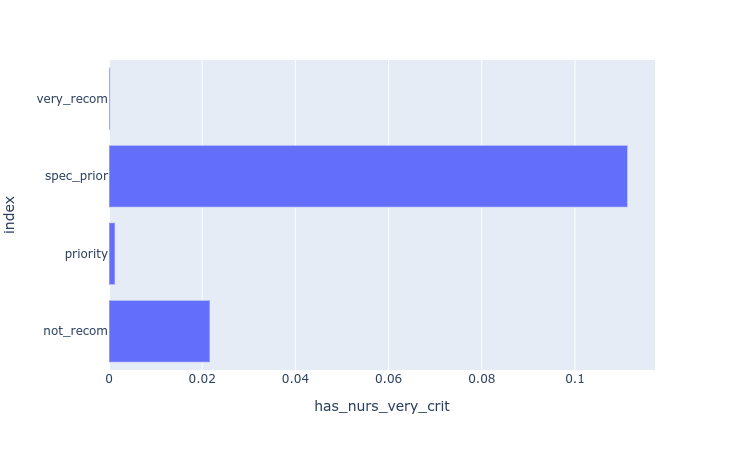

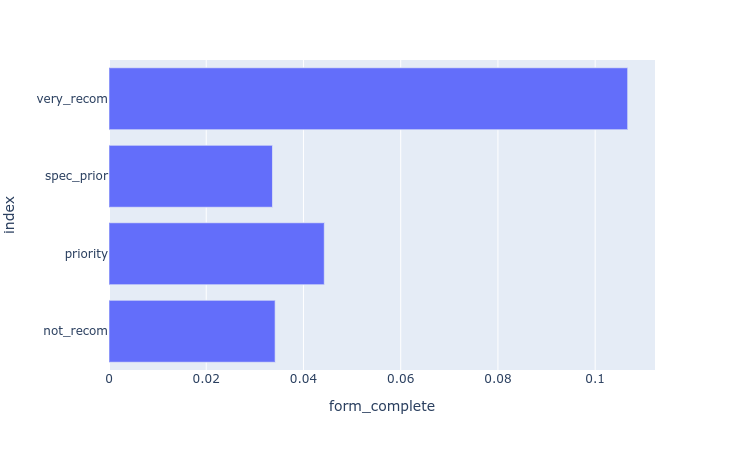

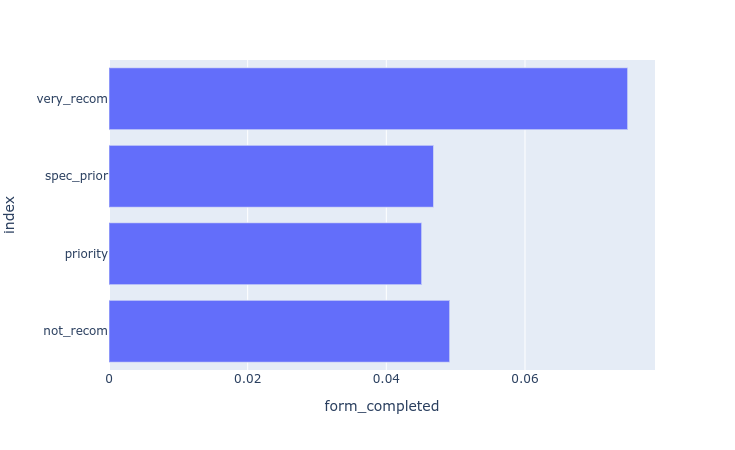

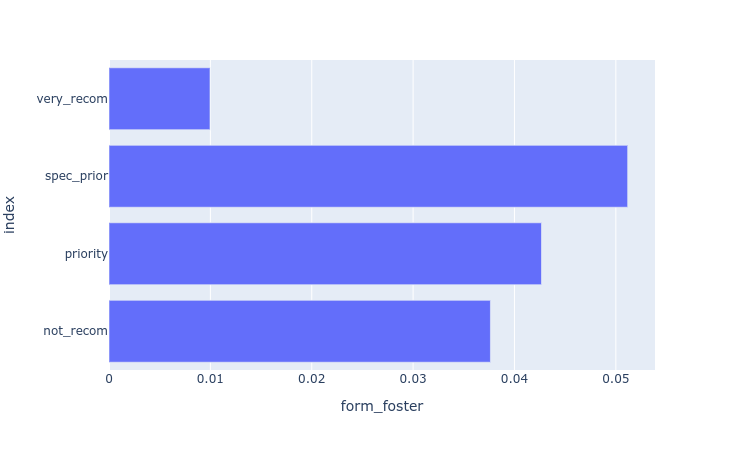

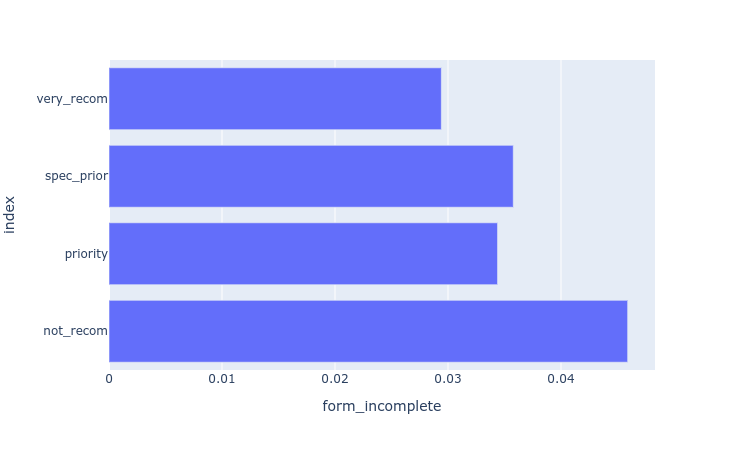

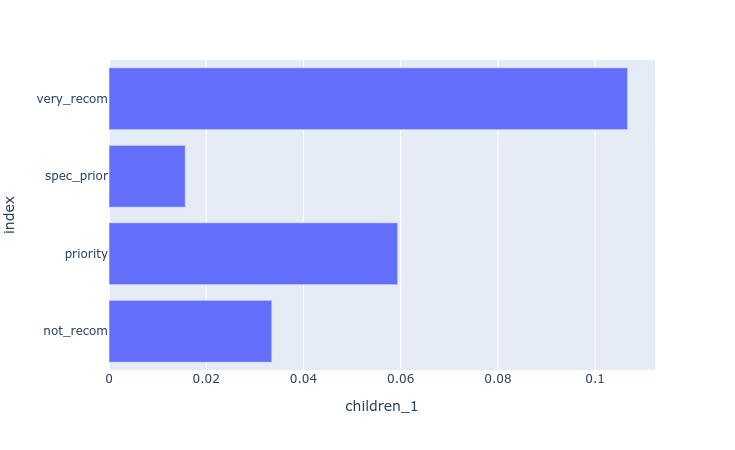

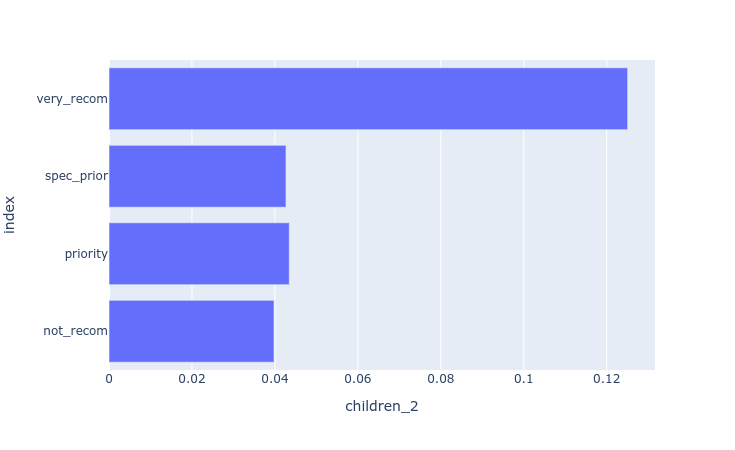

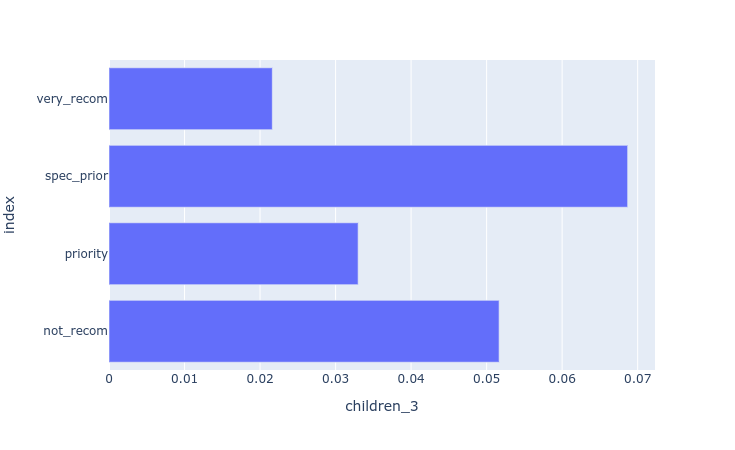

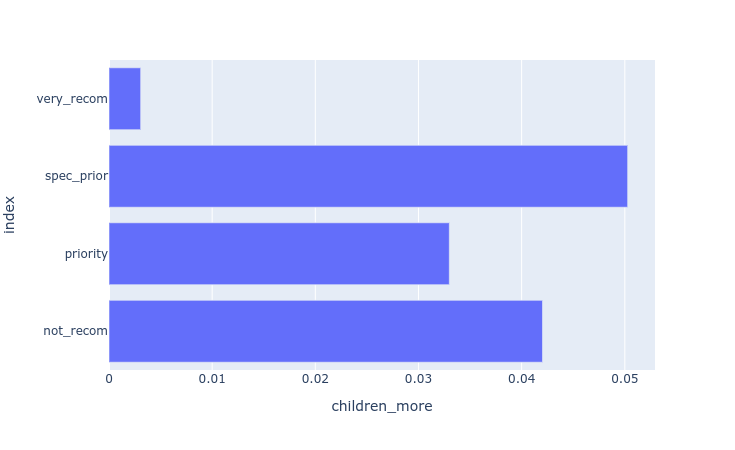

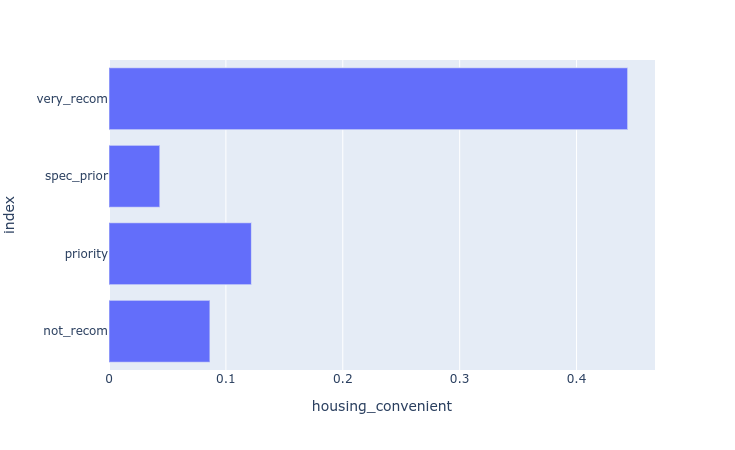

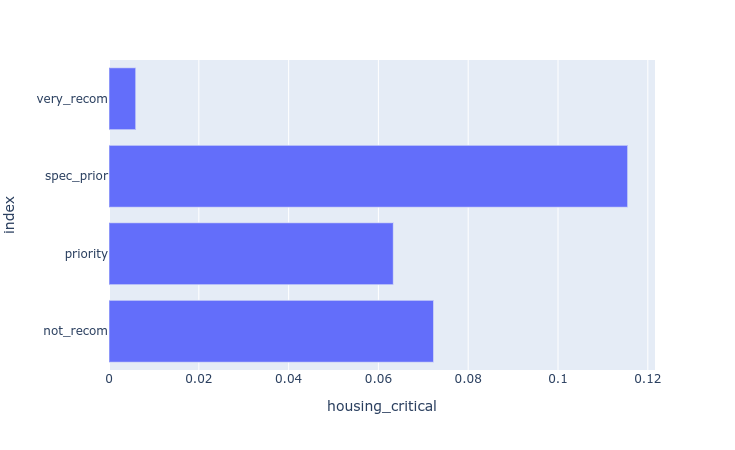

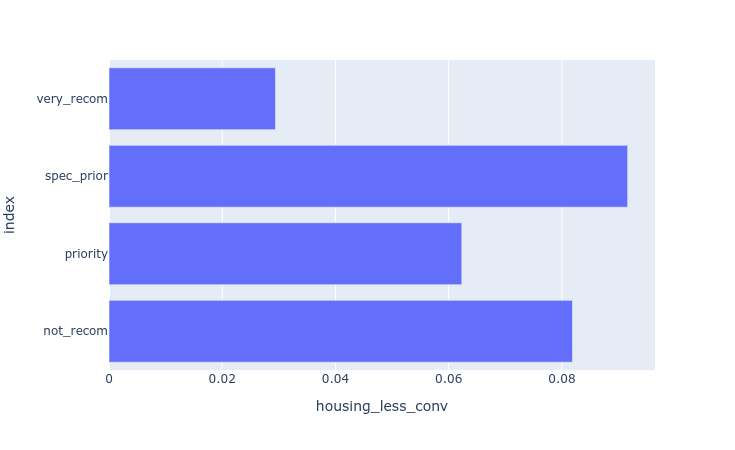

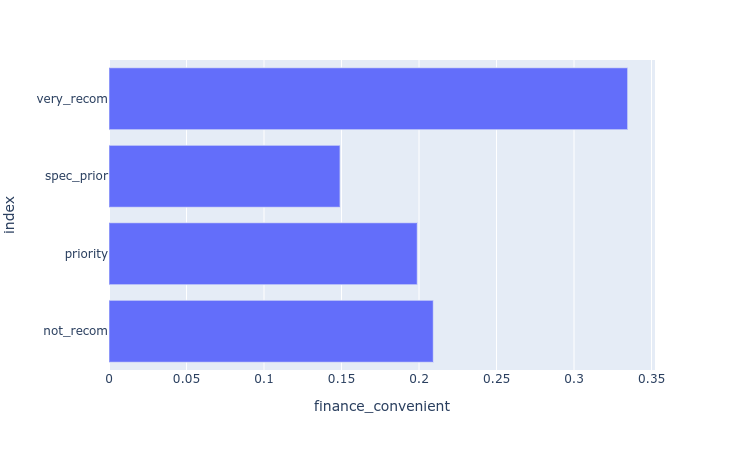

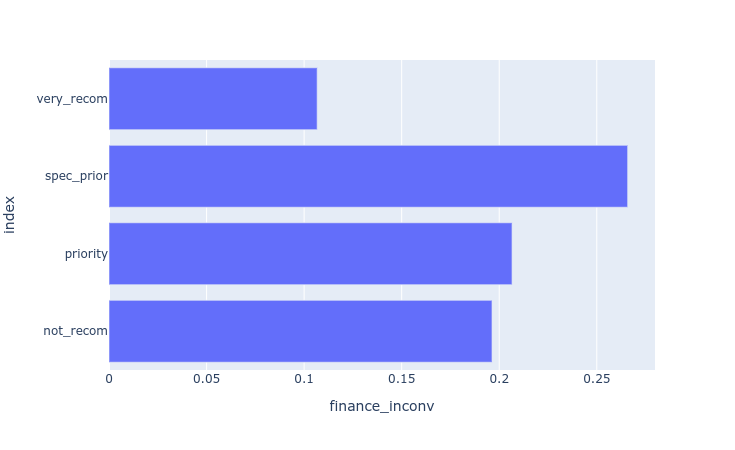

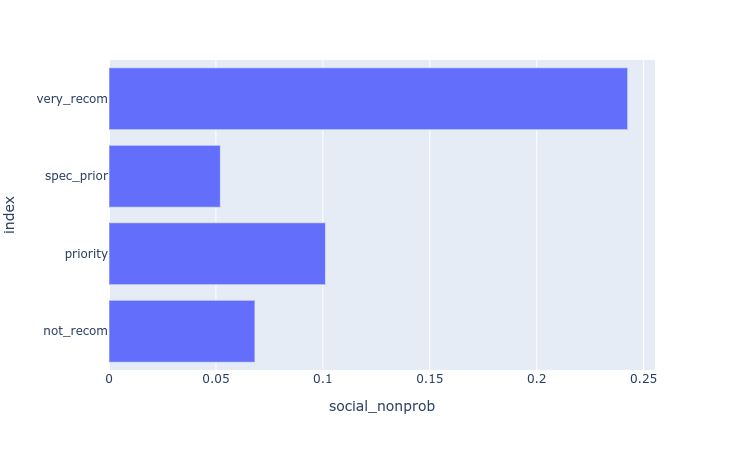

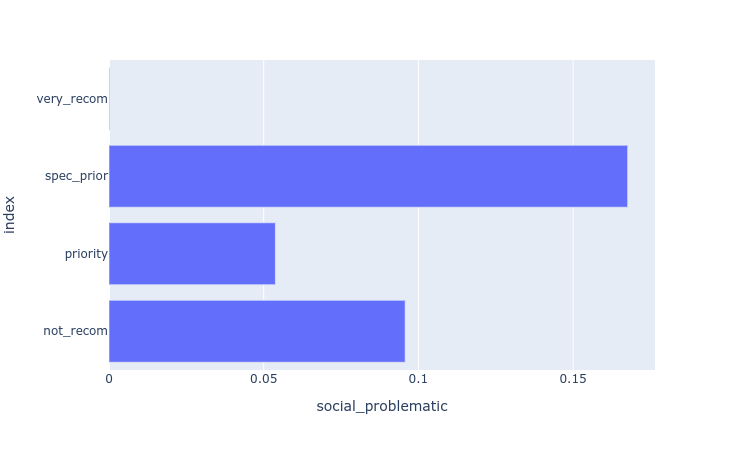

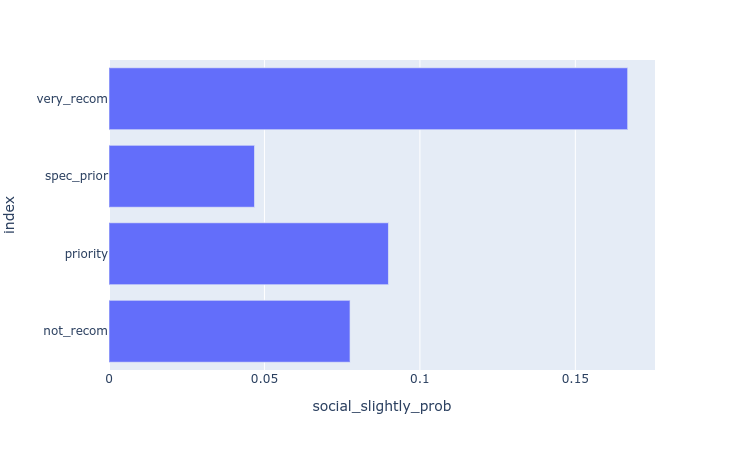

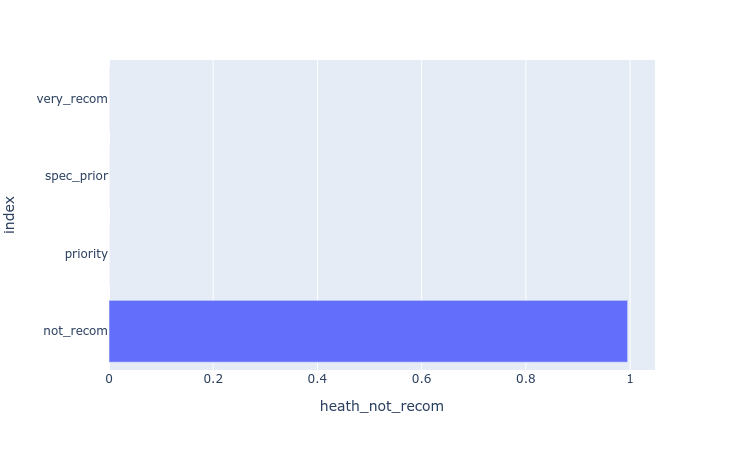

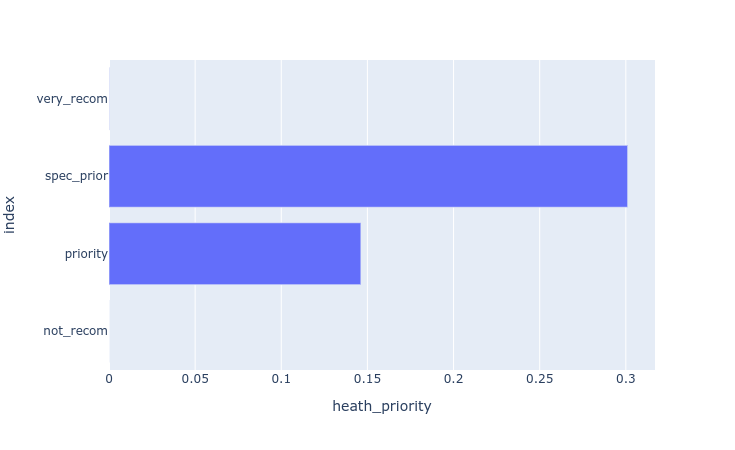

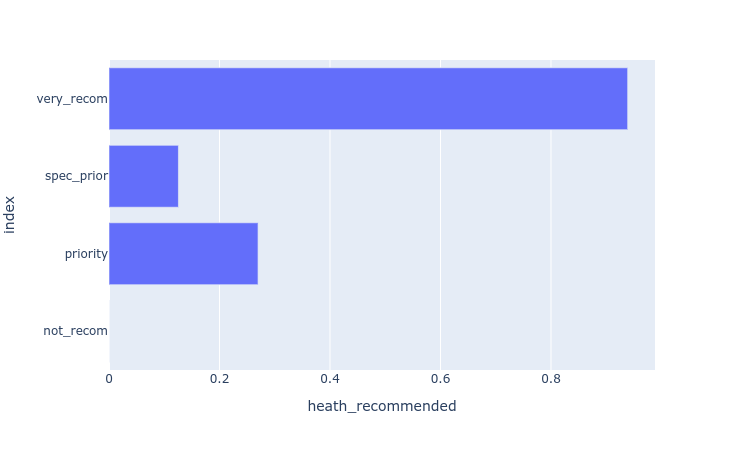

In [98]:
for i in output.columns:
  fig = px.bar(output, x=i)
  (fig.show())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="n+-#0`*wD8rg+dSg6M^w">i</variable><variable id="B1+(FA+B_0M9*6bKcj,o">output</variable><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="controls_forEach" id="7YJ)K?q9poiHMo2hO,si" x="159" y="297"><field name="VAR" id="n+-#0`*wD8rg+dSg6M^w">i</field><value name="LIST"><block type="varGetProperty" id="k3#lLk(++xN{Qk3$B!$/"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field><field name="MEMBER">columns</field><data>output:columns</data></block></value><statement name="DO"><block type="variables_set" id="JN`QXdt~zSW=Hr{(pqls"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="{:}eVR02P7FStzQGj0GV"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="INPUT"><block type="lists_create_with" id="+1ab50iuN1{=}kB6mhZH"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="mQ9=gXbU-Tlr[a!+Z~PN"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="hJq@W1q];BsF7]9/8:rP"><field name="CODE">x=i</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="(zDrmSRou~?8NOFz?_:t"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id="S6kF2H)`W^?,.3{VU8x1"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></value></block></next></block></statement></block></xml>

Quite a few of these predictors make one class label much more likely than the other labels.
This suggests that the naive Bayes assumption of independent predictors is reasonable for this dataset.

## Submit your work

When you have finished the notebook, please download it, log in to [OKpy](https://okpy.org/) using "Student Login", and submit it there.

Then let your instructor know on Slack.
